In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Wine_clust.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
# Check for missing values
data.isnull().sum()


,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [6]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

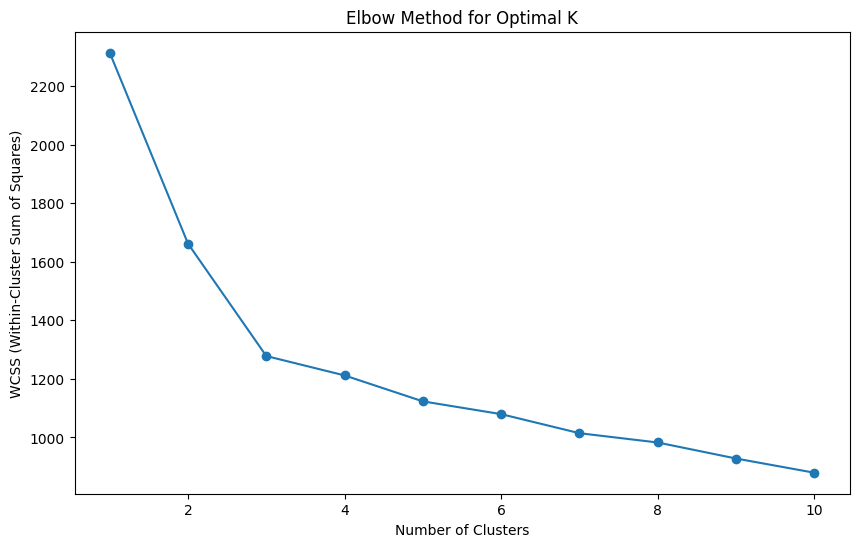

In [8]:
# K-Means Clustering with Elbow Method
from sklearn.cluster import KMeans
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

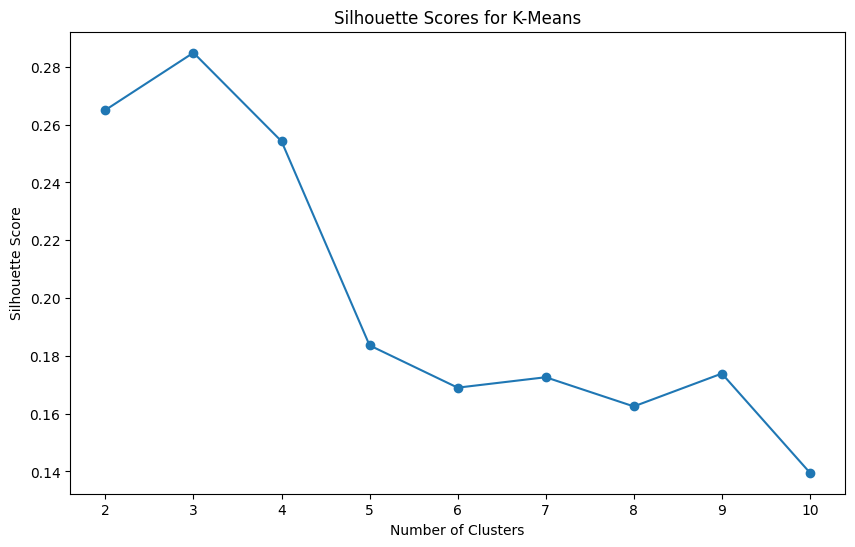

In [9]:
# Silhouette Scores for K-Means
from sklearn.metrics import silhouette_score
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil_scores.append(silhouette_score(data_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

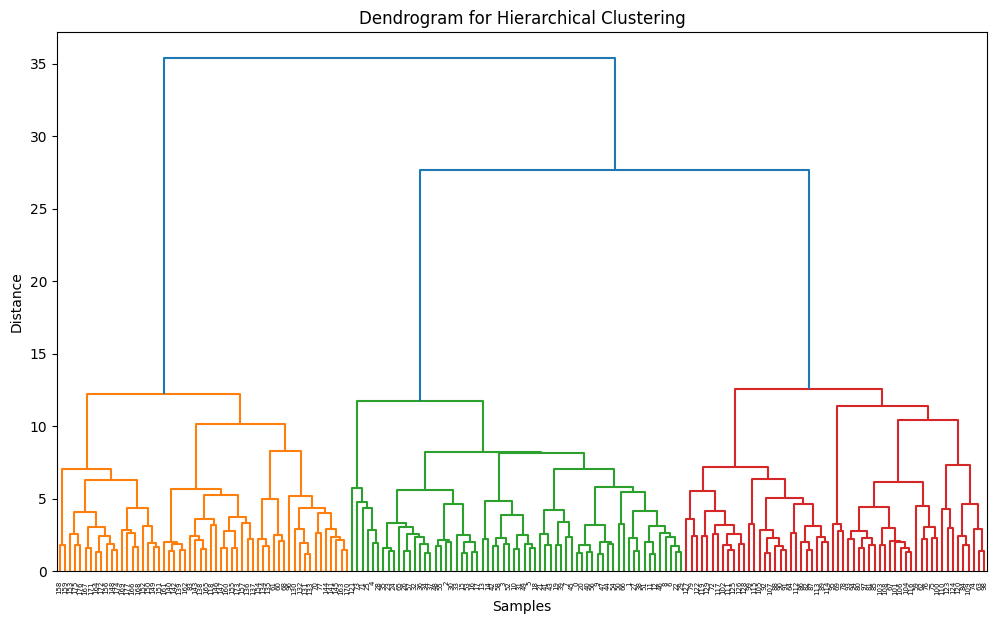

In [11]:
# Hierarchical Clustering - Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(12, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

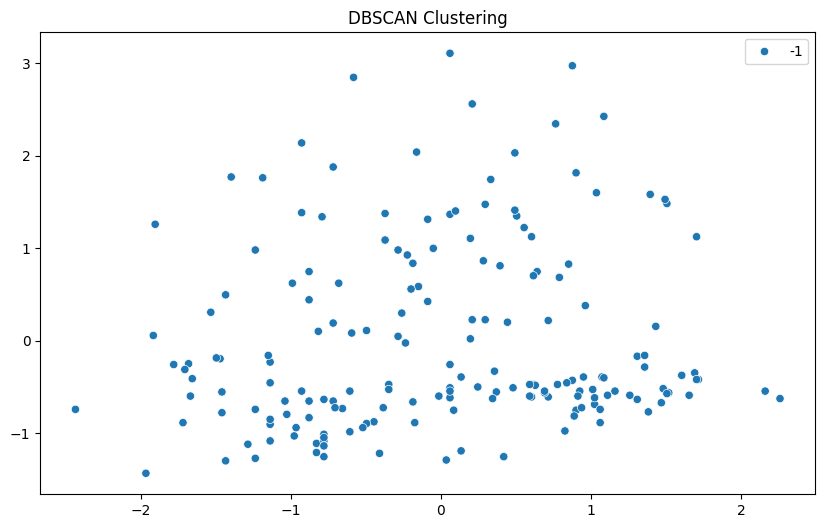

In [20]:
# DBSCAN clustering
from sklearn.cluster import DBSCAN

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)  # Get cluster labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=dbscan_labels.astype(str), palette='tab10')
plt.title('DBSCAN Clustering')
plt.show()


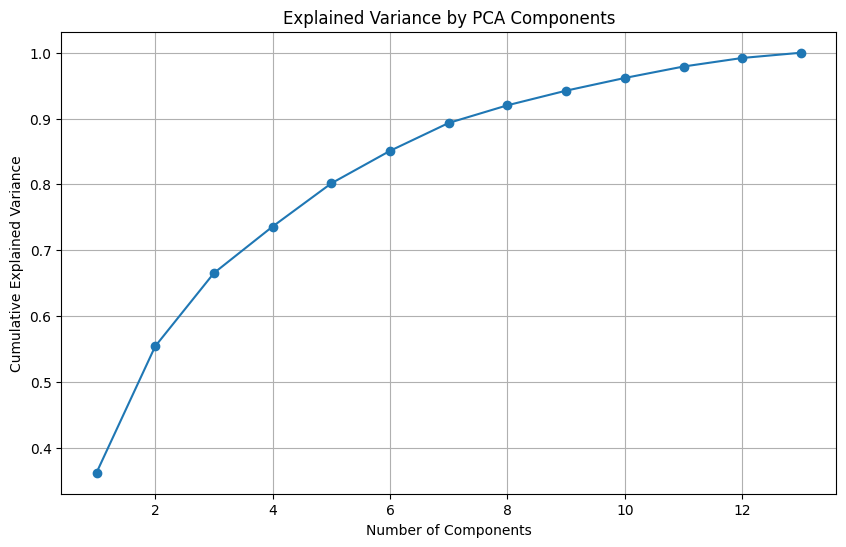

In [17]:
from sklearn.decomposition import PCA

# Apply PCA without specifying number of components
pca = PCA()
pca.fit(data_scaled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [18]:
# Reduce to 2 components (for easy visualization and clustering)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame for visualization
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
print(wine_pca_df.head())


        PC1       PC2
0  3.316751  1.443463
1  2.209465 -0.333393
2  2.516740  1.031151
3  3.757066  2.756372
4  1.008908  0.869831


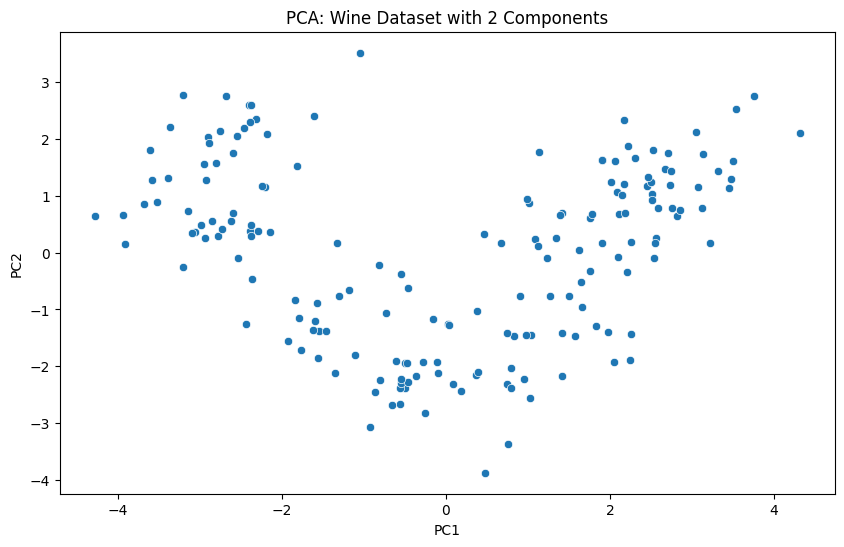

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=wine_pca_df)
plt.title('PCA: Wine Dataset with 2 Components')
plt.show()